In [1]:
from langgraph.graph import StateGraph ,END,START
from typing import TypedDict

In [3]:
class BatsmanState(TypedDict):
    runs:int
    balls:int
    fours:int
    sixes:int

    sr:float
    bpb:float
    boundary_percent:float

In [13]:
def sr(state:BatsmanState):

    sr=(state["runs"]/state["balls"])*100

    return {"sr":sr}

In [5]:
def bpb(state:BatsmanState):

    bpb=state['balls']/(state['fours']+state["sixes"])
    
    return {"bpb":bpb}

In [6]:
def boundary_percent(state:BatsmanState):
    boundary_percent=(((state['fours']*4)+(state["sixes"]*6))/state['runs'])*100

    return {'boundary_percent': boundary_percent}

In [18]:
def summary(state:BatsmanState):
     summary = f"""
Strike Rate - {state['sr']} \n
Balls per boundary - {state['bpb']} \n
Boundary percent - {state['boundary_percent']}
"""
     return {'summary':summary}

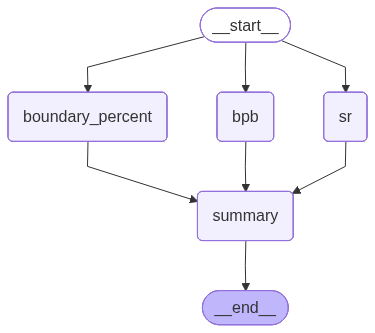

In [19]:
graph=StateGraph(BatsmanState)


graph.add_node("sr",sr)
graph.add_node("bpb",bpb)
graph.add_node("boundary_percent",boundary_percent)
graph.add_node("summary",summary)


graph.add_edge(START,"sr")
graph.add_edge(START,"boundary_percent")
graph.add_edge(START,"bpb")

graph.add_edge("sr","summary")
graph.add_edge("bpb","summary")
graph.add_edge("boundary_percent","summary")

graph.add_edge("summary",END)


graph.compile()


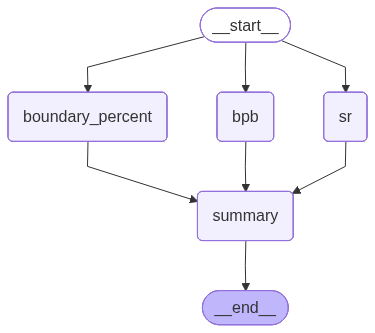

In [20]:
workflow=graph.compile()
workflow

In [21]:
intial_state = {
    'runs': 100,
    'balls': 50,
    'fours': 6,
    'sixes': 4
}


In [22]:
workflow.invoke(intial_state)

{'runs': 100,
 'balls': 50,
 'fours': 6,
 'sixes': 4,
 'sr': 200.0,
 'bpb': 5.0,
 'boundary_percent': 48.0}